In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import make_csv

In [2]:
npz_data = np.load("please_shortlived_vals.npz")
print(npz_data.files)

['T', 'Tcm', 'dQdt', 'pn', 'np', 'rhonu', 'T_initial', 'eta_initial', 'failsafe', 'ns_0', 'vs_mass', 'mix_ang', 'row']


In [3]:
T = npz_data['T']
dqdt = npz_data['dQdt']
T_fit_dqdt = CubicSpline(T[::-1], dqdt[::-1])

(1e-29, 1e-16)

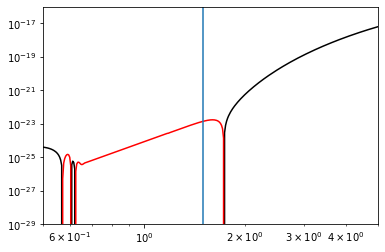

In [4]:
TT = np.logspace(-2,1,1000)
plt.figure()
plt.loglog(TT, T_fit_dqdt(TT), color='k')
plt.loglog(TT, -T_fit_dqdt(TT), color='r')
plt.axvline(1.5)
plt.xlim(0.5,5)
plt.ylim(1e-29, 1e-16)

In [5]:
TT[600]

0.633580499265825

In [6]:
der = np.diff(T_fit_dqdt(TT))/(np.diff(TT))

In [7]:
q = np.where(der<0)[0]

In [36]:
tran = q[-1]

(1e-29, 1e-16)

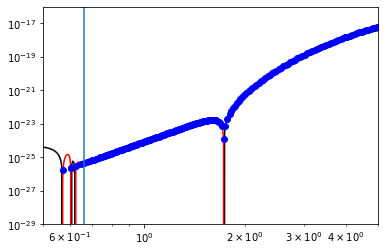

In [9]:
TT = np.logspace(-2,1,1000)
plt.figure()
plt.loglog(TT, T_fit_dqdt(TT), color='k')
plt.loglog(TT, -T_fit_dqdt(TT), color='r')
plt.loglog(T, np.abs(dqdt), 'bo')
plt.axvline(0.6635)
plt.xlim(0.5,5)
plt.ylim(1e-29, 1e-16)

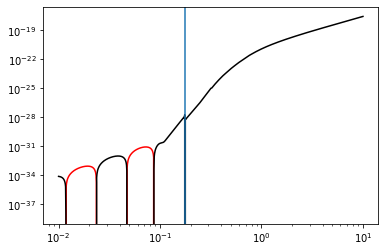

In [31]:
npz_data2 = np.load("../RMFK_BBN_Results/processed-mass-300-life-1.846.npz")
T2 = npz_data2['T']
dqdt2 = npz_data2['dQdt']
T_fit_dqdt2 = CubicSpline(T2[::-1], dqdt2[::-1])
plt.figure()
plt.loglog(TT, -T_fit_dqdt2(TT), color='r')
plt.loglog(TT, T_fit_dqdt2(TT), color='k')
plt.axvline(0.178)


In [13]:
deriv = np.diff(T_fit_dqdt2(TT))/(np.diff(TT))
q1 = np.where(deriv<0)[0]

In [29]:
q1[-1]

417

In [30]:
TT[417]

0.17875255259042355